In [ ]:
# import all usfull libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  # this plot dowload option


#import plotly.express as px

# Sample data
#df = px.data.iris()

# Create interactive scatter plot
#fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")

# Show in browser (interactive)
#fig.show()

In [ ]:
# Read the data

#https://www.kaggle.com/code/prabhuyesu/cyberbullying-tweets

data = pd.read_csv("/content/drive/MyDrive/all ml/cyberbullying_tweets.csv")

In [ ]:
data.shape

(47692, 2)

In [ ]:
# checking top 5 in dataset

data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
data.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [ ]:

# checking dataset shape

data.shape

(47692, 2)

In [ ]:
# cheking all feature info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
#checking duplicates in column tweet_text

data["tweet_text"].duplicated().sum()

np.int64(1675)

In [ ]:

#removing the duplicates in column

data.drop_duplicates("tweet_text", inplace=True)

In [ ]:
data["tweet_text"].duplicated().sum()

np.int64(0)

In [ ]:
#checking null values
data.isnull().sum()

,0
tweet_text,0
cyberbullying_type,0


In [ ]:
data.shape

(46017, 2)

In [ ]:

#checking values counts cyberbulling


data.cyberbullying_type.value_counts()

,count
cyberbullying_type,
religion,7995
age,7992
ethnicity,7952
not_cyberbullying,7937
gender,7898
other_cyberbullying,6243


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
import pandas as pd # Import pandas library for data manipulation
import numpy as np # Import numpy library for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for advanced plotting
import re # Import regular expression library for text manipulation
import string # Import string library for string operations
import nltk # Import nltk library for natural language processing
from nltk.corpus import stopwords # Import stopwords from nltk
from nltk.stem import PorterStemmer # Import PorterStemmer for stemming
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer for lemmatization

# Download necessary NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#removing the stops words in tweet_text


stopwords = stopwords.words('english')

def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stopwords]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14)
    return text

In [ ]:
import re

def decontract(text):
    # Replace "can't" with "can not"
    text = re.sub(r"can\'t", "can not", text)

    # Replace other contractions ending in "n't" (e.g., "don't" -> "do not")
    text = re.sub(r"n\'t", " not", text)

    # Replace "'re" with "are" (e.g., "you're" -> "you are")
    text = re.sub(r"\'re", " are", text)

    # Replace "'s" with "is" (e.g., "he's" -> "he is")
    text = re.sub(r"\'s", " is", text)

    # Replace "'d" with "would" (e.g., "you'd" -> "you would")
    text = re.sub(r"\'d", " would", text)

    # Replace "'ll" with "will" (e.g., "she'll" -> "she will")
    text = re.sub(r"\'ll", " will", text)

    # Replace "'t" with "not" (e.g., handles redundant contractions missed earlier)
    text = re.sub(r"\'t", " not", text)

    # Replace "'ve" with "have" (e.g., "I've" -> "I have")
    text = re.sub(r"\'ve", " have", text)

    # Replace "'m" with "am" (e.g., "I'm" -> "I am")
    text = re.sub(r"\'m", " am", text)

    # Return the fully decontracted text
    return text


In [ ]:
import re

def clean_hashtags(tweet):
    # Remove hashtags that do not contain the word "hashtag".
    # The regular expression looks for words starting with '#' that are not followed by "hashtag".
    # These words are removed by splitting them using the pattern.
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))

    # Remove any remaining '#' or '_' characters from the text and split words.
    # This ensures that any part of the text containing these characters is cleaned further.
    new_tweet2 = " ".join( word.strip() for word in re.split('#|_', new_tweet))

    # Return the final cleaned tweet.
    return new_tweet2


<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-3848704297.py:7: SyntaxWarning: invalid escape sequence '\w'
  new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))


In [ ]:
def filter_chars(a):
    # Initialize an empty list to store words that don't contain '$' or '&'
    sent = []

    # Iterate through each word in the input string
    for word in a.split(' '):
      # Check if the word contains '$' or '&'. If not, keep it.
        if ('$' in word) | ('&' in word):

            sent.append('')
        else:
            sent.append(word)
            # Join the remaining words back into a single string and return
    return ' '.join(sent)

In [ ]:
#remove_mult_spaces

def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2891506906.py:4: SyntaxWarning: invalid escape sequence '\s'
  return re.sub("\s\s+" , " ", text)


In [ ]:
# stemmer

def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

In [ ]:
# lemmatize

def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [ ]:
def deep_clean(text):


    # Step 1: Expand contractions (e.g., "can't" → "can not")
    text = decontract(text)

    # Step 2: Remove entities like mentions (@username), URLs, or other special entities
    text = strip_all_entities(text)

    # Step 3: Clean hashtags by removing or normalizing them
    text = clean_hashtags(text)

    # Step 4: Remove words containing unwanted characters (e.g., $, &)
    text = filter_chars(text)

    # Step 5: Remove extra spaces, ensuring clean formatting
    text = remove_mult_spaces(text)

    # Step 6: Stem the text to reduce words to their root forms
    text = stemmer(text)  # Ensure you are using the correct stemmer function

    # Return the final cleaned text
    return text


In [ ]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Initialize an empty list to store cleaned tweets
texts_new = []

# Loop through each tweet in the 'tweet_text' column of the DataFrame
for t in data.tweet_text:
    # Apply the 'deep_clean' function to preprocess the tweet
    # 'deep_clean' performs text cleaning such as removing URLs, hashtags, special characters, etc.
    # Append the cleaned tweet to the 'texts_new' list
    texts_new.append(deep_clean(t))


In [ ]:
# Assign the list of cleaned tweets (texts_new) to a new column 'text_clean' in the DataFrame
data['text_clean'] = texts_new

# Display the first 5 rows of the DataFrame to verify the results
data.head()


,tweet_text,cyberbullying_type,text_clean
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock today sunris studi...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...


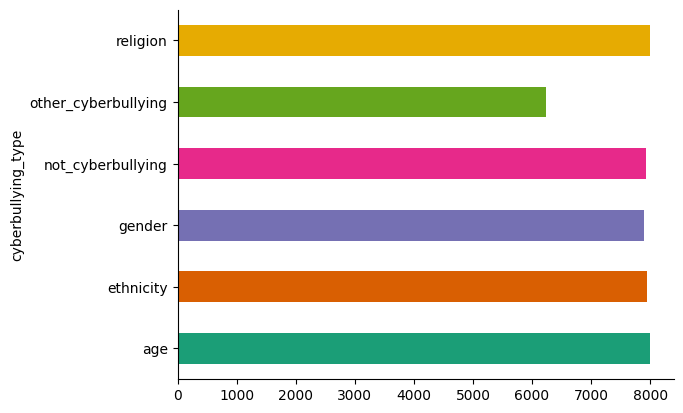

In [ ]:
# @title cyberbullying_type

# Display the plot
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('cyberbullying_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import plotly.express as px

# Create interactive bar plot
fig = px.bar(data.groupby('cyberbullying_type').size().reset_index(name='count'),
             x='count',
             y='cyberbullying_type',
             orientation='h',
             title='Distribution of Cyberbullying Types')

# Show in browser (interactive)
fig.show()

In [ ]:
# Filter the 'data' DataFrame to remove rows where the 'cyberbullying_type' is 'other_cyberbullying'
# This will focus the analysis on the specified types of cyberbullying
data = data[data["cyberbullying_type"] != "other_cyberbullying"]

cyberbullying_type = ["religion", "age", "ethnicity", "gender", "not bullying"]


In [ ]:
# Initialize an empty list to store the length of each cleaned tweet (in terms of word count)
text_len = []

# Loop through each cleaned tweet in the 'text_clean' column of the 'data' DataFrame
for text in data.text_clean:
    # Calculate the number of words in the tweet by splitting the text into words and counting them
    tweet_len = len(text.split())

    # Append the calculated length (word count) to the 'text_len' list
    text_len.append(tweet_len)


In [ ]:
data['text_len'] = text_len

In [ ]:
import plotly.express as px

# Create interactive countplot of tweets with less than 10 words
fig = px.histogram(data[data['text_len'] < 10],
                   x='text_len',
                   title='Count of tweets with less than 10 words')

# Show in browser (interactive)
fig.show()

In [ ]:
import plotly.express as px

# Filter data (tweets length < 10)
filtered = data[data['text_len'] < 10]

# Create interactive bar plot
fig = px.histogram(filtered,
                   x="text_len",
                   color_discrete_sequence=px.colors.sequential.Plasma,
                   title="Count of tweets with less than 10 words")

# Remove y ticks (as in your sns code)
fig.update_yaxes(showticklabels=False, title_text="Count")

# Remove x-axis title
fig.update_xaxes(title_text="")

# Show values on bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Layout settings
fig.update_layout(
    title_font_size=20,
    bargap=0.2,
    uniformtext_minsize=10,
    uniformtext_mode='hide'
)

# Show plot
fig.show()

/tmp/ipython-input-4155787631.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




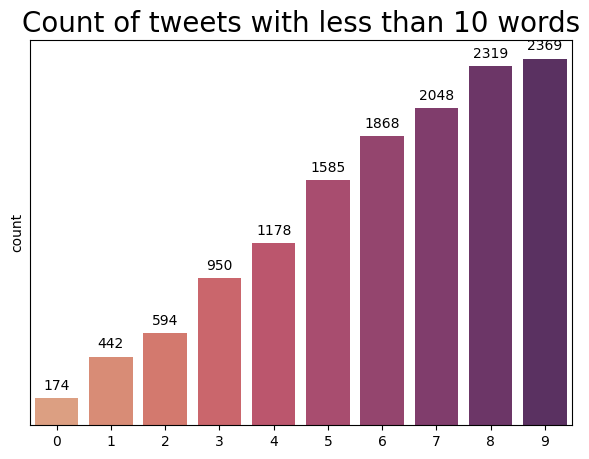

In [ ]:
# ... (Your existing code) ...

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=data[data['text_len']<10], palette='flare')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
# Iterate through the containers and add labels, handling potential zero counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
data.info()#infromation of the datasest

<class 'pandas.core.frame.DataFrame'>
Index: 39774 entries, 0 to 47691
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          39774 non-null  object
 1   cyberbullying_type  39774 non-null  object
 2   text_clean          39774 non-null  object
 3   text_len            39774 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
# Filter the 'data' DataFrame to keep only the rows where the length of the cleaned tweet ('text_len') is greater than 3 words
# This filters out short tweets that may not provide much meaningful information
data = data[data['text_len'] > 3]


In [ ]:
# Sort the 'data' DataFrame by the 'text_len' column in descending order
# This will arrange the tweets from the longest (most words) to the shortest (fewest words)
data.sort_values(by=['text_len'], ascending=False)


,tweet_text,cyberbullying_type,text_clean,text_len
44035,You so black and white trying to live like a n...,ethnicity,black white tri live like nigger pahahahaha co...,187
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",ethnicity,fuck obama dumb ass nigger bitch ltthi whore s...,162
33724,"... I don't feel guilty for killing him, I jus...",age,feel guilti kill feel guilti enjoy torment sin...,137
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying,research push import top antibulli program us ...,137
47037,@Purely_Ambition: Sooo mad. RT @TracePeterson ...,ethnicity,sooo mad rt fuck obama dumb nigger go switzerl...,125
...,...,...,...,...
41154,@Yepimaasshole: some dumb hoes and some fuck n...,ethnicity,dumb hoe fuck nigger,4
6091,already taken by cocos (L)__(K).,not_cyberbullying,alreadi taken coco lk,4
6093,"Rob, ditch your hat!! #mkr",not_cyberbullying,rob ditch hat mkr,4
43873,You niggers sure are dumb as fuck,ethnicity,nigger sure dumb fuck,4


In [ ]:
import plotly.express as px

# Filter data (tweets length between 10 and 1000 words)
filtered = data[(data['text_len'] <= 1000) & (data['text_len'] > 10)]

# Create interactive histogram (countplot equivalent)
fig = px.histogram(filtered,
                   x="text_len",
                   nbins=50,  # binning for better readability, adjust if needed
                   color_discrete_sequence=px.colors.sequential.Magma,
                   title="Count of tweets with high number of words")

# Remove y-axis tick labels (like plt.yticks([]))
fig.update_yaxes(showticklabels=False, title_text="Count")

# Remove x-axis label
fig.update_xaxes(title_text="")

# Show values on bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Layout settings
fig.update_layout(
    title_font_size=25,
    bargap=0.1,
    uniformtext_minsize=10,
    uniformtext_mode='hide'
)

# Show interactive plot
fig.show()


/tmp/ipython-input-2432172255.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




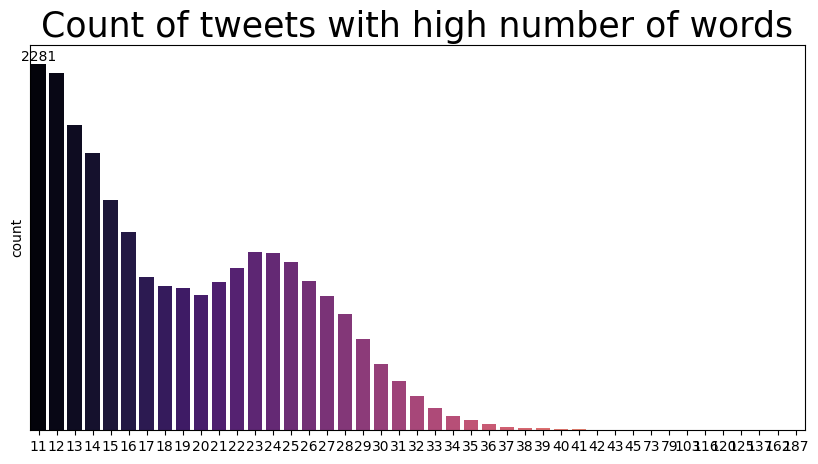

In [ ]:
# Set the figure size for the plot (width=16, height=5)
plt.figure(figsize=(10,5))

# Create a countplot using seaborn to show the distribution of 'text_len' values
# We filter the data to include tweets with a word count between 10 and 1000
# 'palette="magma"' specifies a color palette for the plot
ax = sns.countplot(x='text_len', data=data[(data['text_len']<=1000) & (data['text_len']>10)], palette='magma')

# Add a title to the plot
plt.title('Count of tweets with high number of words', fontsize=25)

# Remove the y-axis tick labels for a cleaner look
plt.yticks([])

# Add bar labels (count of tweets) to each bar in the countplot
ax.bar_label(ax.containers[0])

# Set the y-axis label as 'count' (number of tweets)
plt.ylabel('count')

# Leave the x-axis label empty for better aesthetics
plt.xlabel('')

# Display the plot
plt.show()


In [ ]:
# Filter the 'data' DataFrame to keep only the rows where the 'text_len' column (word count) is less than 100
# This removes tweets that are longer than 100 words, focusing analysis on shorter tweets
data = data[data['text_len'] < 100]


In [ ]:
# Find the maximum value in the 'text_len' column, which represents the longest tweet (in terms of word count)
max_len = np.max(data['text_len'])

# Output the maximum length (word count) found in the dataset
max_len


79

In [ ]:
# Sort the 'data' DataFrame by the 'text_len' column in descending order
# This will reorder the rows so that the tweet with the highest word count (longest tweet) appears first
data.sort_values(by=["text_len"], ascending=False)


,tweet_text,cyberbullying_type,text_clean,text_len
4846,@andrea_gcav: @viviaanajim recuerdas como noso...,not_cyberbullying,recuerda como nosotra tambin eramo victima del...,79
44294,@JasmineLovvee If He Dont Want You Well Fuck H...,ethnicity,dont want well fuck aint worth tear never swea...,73
45930,"Get off ur ego trip, take off ur rose colored ...",ethnicity,get ur ego trip take ur rose color glass amp g...,45
41749,@seijohgorl hoy mami keito AAAA okay so um ika...,ethnicity,hoy mami keito aaaa okay um ikaw talaga one fi...,43
21241,And yet God was able to meet their needs using...,religion,yet god abl meet need use radic everyday gener...,43
...,...,...,...,...
1231,@Victor_pm123 duvidar de vs é ' bulling ' ? KK...,not_cyberbullying,duvidar de vs bull,4
1236,"Billy Corgan, transphobic bully. http://t.co/d...",not_cyberbullying,billi corgan transphob bulli,4
1246,"Some HITECHWatch: ""Policymaking and the bully ...",not_cyberbullying,hitechwatch policymak bulli pulpit,4
1249,@4everBrandy new album is FIRE! #TwoEleven,not_cyberbullying,new album fire twoeleven,4


In [ ]:
data.head()

,tweet_text,cyberbullying_type,text_clean,text_len
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandr food crapilici mkr,5
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock today sunris studi...,10
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thank head concern anoth angri dude twitter,9
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account like islam...,8


In [ ]:
# Import the LabelEncoder class from sklearn.preprocessing for label encoding
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'cyberbullying_type' column
# This converts categorical labels in 'cyberbullying_type' (like 'religion', 'age', etc.) to numeric values
data['cyberbullying_type'] = le.fit_transform(data['cyberbullying_type'])




In [ ]:
data["cyberbullying_type"].head(10)

,cyberbullying_type
0,3
1,3
2,3
3,3
4,3
5,3
6,3
7,3
9,3
13,3


In [ ]:
data.shape

(37605, 4)

In [ ]:
# Import train_test_split from sklearn.model_selection to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Define the target variable 'y' (cyberbullying type) and independent variable 'x' (cleaned tweet text)
y = data['cyberbullying_type']  # Target or dependent variable (cyberbullying type labels)
x = data['text_clean']  # Independent variable or input (cleaned tweet text)

# First, split the data into training set (60%) and temporary set (40%) using train_test_split
# stratify=y ensures the split maintains the distribution of 'cyberbullying_type'
# random_state=42 ensures reproducibility of the split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

# Second, split the temporary set (X_temp, y_temp) into test (50%) and cross-validation (50%) sets
# stratify=y_temp ensures the distribution of 'cyberbullying_type' is maintained in both sets
# random_state=42 ensures reproducibility of the split
X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [ ]:
print(X_train.shape)

(22563,)


In [ ]:
print(X_test.shape)

(7521,)


In [ ]:
# Import CountVectorizer from sklearn.feature_extraction.text for converting text into a bag-of-words representation
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer instance to convert text into a bag-of-words representation
bow = CountVectorizer()

# Fit and transform the training data (X_train) to create the bag-of-words representation for the training set
# This learns the vocabulary from the training set and converts the text into a sparse matrix of word counts
X_train_bow = bow.fit_transform(X_train)

# Transform the test data (X_test) using the learned vocabulary from the training set
# This converts the test set text into the same bag-of-words format without learning new vocabulary
X_test_bow = bow.transform(X_test)

# Transform the cross-validation data (X_cv) using the learned vocabulary from the training set
# Similar to the test data transformation, this ensures the cross-validation text is represented consistently
X_cv_bow = bow.transform(X_cv)


In [ ]:
X_train_bow.shape

(22563, 24402)

In [ ]:
# Import TfidfVectorizer from sklearn.feature_extraction.text for converting text into TF-IDF representation
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer instance to convert text into TF-IDF (Term Frequency - Inverse Document Frequency) representation
tfidf = TfidfVectorizer()

# Fit and transform the training data (X_train) to create the TF-IDF representation for the training set
# This learns the vocabulary from the training set and computes the TF-IDF values for each word
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data (X_test) using the learned vocabulary and TF-IDF values from the training set
# This converts the test set text into the same TF-IDF format without learning new vocabulary
X_test_tfidf = tfidf.transform(X_test)

# Transform the cross-validation data (X_cv) using the learned vocabulary and TF-IDF values from the training set
# This ensures the cross-validation text is represented consistently using the same vocabulary and TF-IDF values
X_cv_tfidf = tfidf.transform(X_cv)


In [ ]:
X_train_tfidf.shape

(22563, 24402)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier using the TF-IDF representation of the training data
knn.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision for each class
precision = precision_score(y_test, y_pred, average=None) #average=None for per-class precision
print(f"Precision (per class): {precision}")


# Calculate recall for each class
recall = recall_score(y_test, y_pred, average=None) #average=None for per-class recall
print(f"Recall (per class): {recall}")

Accuracy: 0.8048131897354075
Precision (per class): [0.77494577 0.80528053 0.81216931 0.71027027 0.89662447]
Recall (per class): [0.90271636 0.93546326 0.81812125 0.51088647 0.80390921]


# knn bow

In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bow, y_train)

# Predict on the test set and cross-validation set
y_test_pred = knn.predict(X_test_bow)
y_cv_pred = knn.predict(X_cv_bow)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.8798032176572265
0.8821965164206887
0.8798032176572265
0.8821965164206887
0.8798032176572265
0.8821965164206887


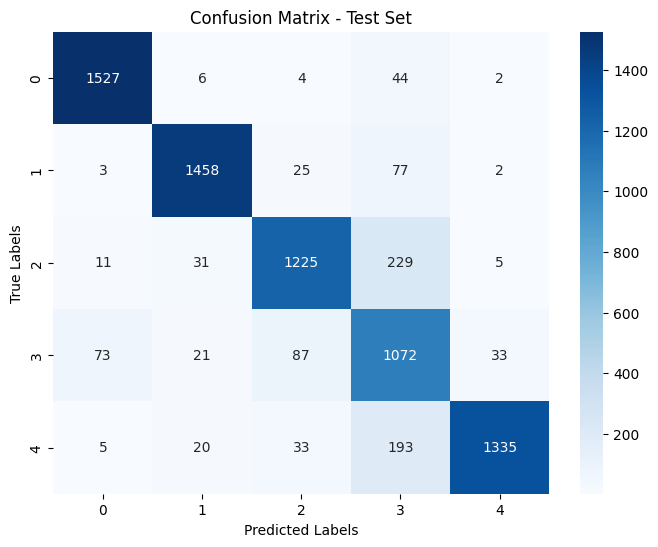

In [ ]:
 #Compute the confusion matrix for the test set
 from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Convert confusion matrix to DataFrame for better labeling
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in set(y_test)],
                     columns=[f"Pred {label}" for label in set(y_test)])

# Create interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,   # Show values inside cells (like annot=True)
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout adjustments
fig.update_layout(title_font_size=20,
                  width=700, height=500)

fig.show()


In [ ]:
# Define the range of k values
import math
k = list(range(1, 50, 2))

train_accuracy = []
cv_accuracy = []

# Loop over the range of k values to tune hyperparameter
for i in k:

    knn = KNeighborsClassifier(n_neighbors=i)

    # Train the classifier
    knn.fit(X_train_bow, y_train)

    # Predict on train and CV sets
    y_train_pred_bow = knn.predict(X_train_bow)
    y_cv_pred_bow = knn.predict(X_cv_bow)

    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train, y_train_pred_bow))
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred_bow))

# Find the optimal k based on maximum CV accuracy
optimal_k = k[cv_accuracy.index(max(cv_accuracy))]

# Apply log transformation to k for plotting
k_log = [math.log(x) for x in k]
print(optimal_k)

9


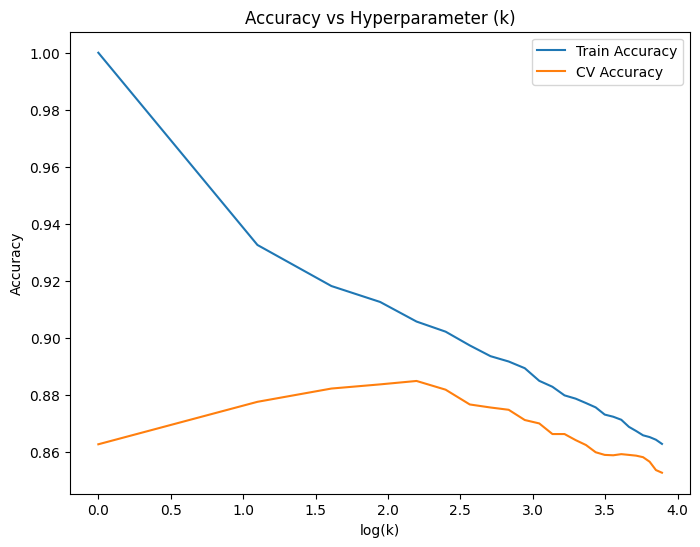

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(k_log, train_accuracy, label='Train Accuracy')
plt.plot(k_log, cv_accuracy, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (k)')
plt.xlabel('log(k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Prepare data in long format for Plotly
df_plot = pd.DataFrame({
    "log_k": k_log,
    "Train Accuracy": train_accuracy,
    "CV Accuracy": cv_accuracy
})

# Convert to long format for easier plotting
df_long = df_plot.melt(id_vars=["log_k"],
                       value_vars=["Train Accuracy", "CV Accuracy"],
                       var_name="Type", value_name="Accuracy")

# Create interactive line plot
fig = px.line(df_long,
              x="log_k",
              y="Accuracy",
              color="Type",
              title="Accuracy vs Hyperparameter (k)")

# Axis labels
fig.update_xaxes(title="log(k)")
fig.update_yaxes(title="Accuracy")

# Layout adjustments
fig.update_layout(title_font_size=20,
                  legend_title_text="",
                  width=800, height=600)

fig.show()


In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_bow, y_train)

# Predict on the test set and cross-validation set
y_train_pred_bow=knn.predict(X_train_bow)
y_test_pred_bow = knn.predict(X_test_bow)
y_cv_pred_bow = knn.predict(X_cv_bow)

# Evaluate the model
train_accuracy_bow_knn= accuracy_score(y_train,y_train_pred_bow)
test_accuracy_bow_knn = accuracy_score(y_test, y_test_pred_bow)
cv_accuracy_bow_knn = accuracy_score(y_cv, y_cv_pred_bow)

train_precision_bow_knn= precision_score(y_train,y_train_pred_bow, average='macro')
test_precision_bow_knn = precision_score(y_test, y_test_pred_bow, average='macro')
cv_precision_bow_knn = precision_score(y_cv, y_cv_pred_bow, average='macro')

train_recall_bow_knn= recall_score(y_train,y_train_pred_bow, average='macro')
test_recall_bow_knn = recall_score(y_test, y_test_pred_bow, average='macro')
cv_recall_bow_knn = recall_score(y_cv, y_cv_pred_bow, average='macro')

In [ ]:
print(train_accuracy_bow_knn)
print(test_accuracy_bow_knn)
print(cv_accuracy_bow_knn)
print(train_precision_bow_knn)
print(test_precision_bow_knn)
print(cv_precision_bow_knn)
print(train_recall_bow_knn)
print(test_recall_bow_knn)
print(cv_recall_bow_knn)

0.9056863005805965
0.8803350618268847
0.8848557372689801
0.9077420444874166
0.8842454453538823
0.889515134991558
0.9038240862816493
0.8778146028235312
0.8825585610302115


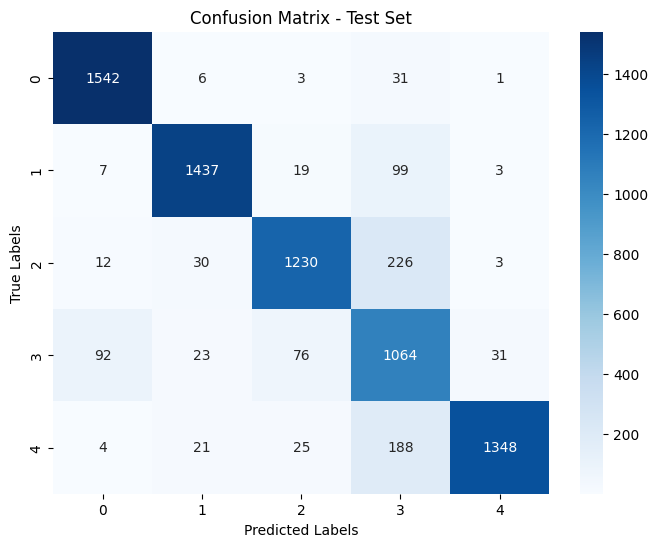

In [ ]:
 #Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred_bow)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_bow)

# Convert confusion matrix into DataFrame for better display
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in set(y_test)],
                     columns=[f"Pred {label}" for label in set(y_test)])

# Create interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set (BoW)")

# Update axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Adjust layout
fig.update_layout(title_font_size=20,
                  width=700, height=500)

# Show plot
fig.show()


In [ ]:
col=['Featuraization', 'Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall']
#results=pd.DataFrame(columns=['Featuraization', 'Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall'])
bow = pd.DataFrame([['BOW','KNN',train_accuracy_bow_knn,test_accuracy_bow_knn,cv_accuracy_bow_knn,train_precision_bow_knn,test_precision_bow_knn,cv_precision_bow_knn,train_recall_bow_knn,test_recall_bow_knn,cv_recall_bow_knn]],columns=col)
#results.loc[0] = new

In [ ]:
bow

,Featuraization,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,BOW,KNN,0.905686,0.880335,0.884856,0.907742,0.884245,0.889515,0.903824,0.877815,0.882559


# tfidf

In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

# Predict on the test set and cross-validation set
y_test_pred = knn.predict(X_test_tfidf)
y_cv_pred = knn.predict(X_cv_tfidf)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)
test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.8048131897354075
0.8076053716261136
0.8048131897354075
0.8076053716261136
0.8048131897354075
0.8076053716261136


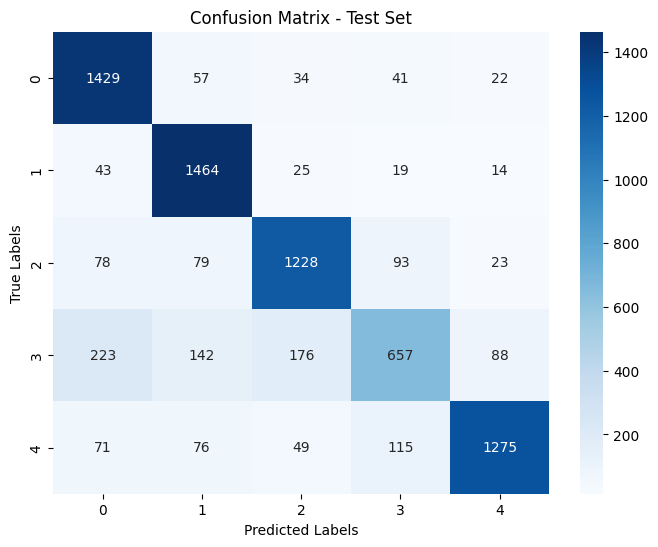

In [ ]:
 #Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Convert confusion matrix to DataFrame
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in set(y_test)],
                     columns=[f"Pred {label}" for label in set(y_test)])

# Create interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,               # like annot=True
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=500)

fig.show()


In [ ]:
# Define the range of k values
k = list(range(1, 50, 2))

train_accuracy = []
cv_accuracy = []

# Loop over the range of k values to tune hyperparameter
for i in k:

    knn = KNeighborsClassifier(n_neighbors=i)

    # Train the classifier
    knn.fit(X_train_tfidf, y_train)

    # Predict on train and CV sets
    y_train_pred_tfidf = knn.predict(X_train_tfidf)
    y_cv_pred_tfidf = knn.predict(X_cv_tfidf)

    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train, y_train_pred_tfidf))
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred_tfidf))

# Find the optimal k based on maximum CV accuracy
optimal_k = k[cv_accuracy.index(max(cv_accuracy))]

# Apply log transformation to k for plotting
k_log = [math.log(x) for x in k]
print(optimal_k)

47


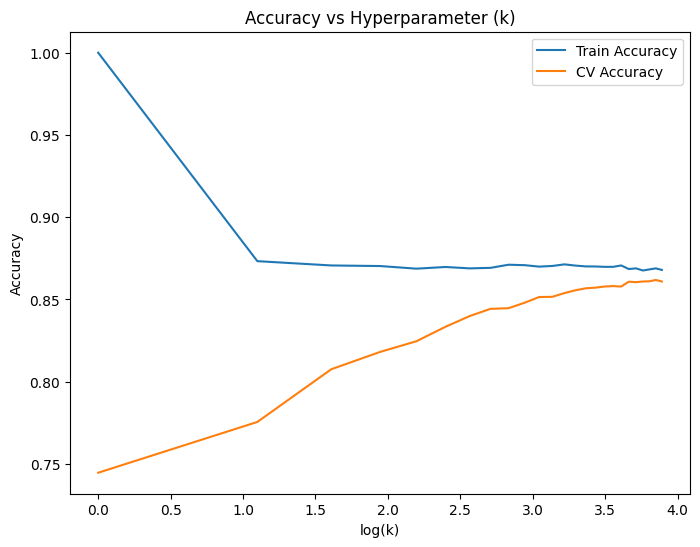

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(k_log, train_accuracy, label='Train Accuracy')
plt.plot(k_log, cv_accuracy, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (k)')
plt.xlabel('log(k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# DataFrame
df_plot = pd.DataFrame({
    "log_k": k_log,
    "Train Accuracy": train_accuracy,
    "CV Accuracy": cv_accuracy
})

# Long format
df_long = df_plot.melt(id_vars=["log_k"],
                       value_vars=["Train Accuracy", "CV Accuracy"],
                       var_name="Type", value_name="Accuracy")

# Interactive line plot
fig = px.line(df_long,
              x="log_k",
              y="Accuracy",
              color="Type",
              markers=True,
              title="Accuracy vs Hyperparameter (k)")

# Axis labels
fig.update_xaxes(title="log(k)")
fig.update_yaxes(title="Accuracy")

# Layout
fig.update_layout(title_font_size=20,
                  legend_title_text="",
                  width=800, height=600)

fig.show()


In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_tfidf, y_train)

# Predict on the test set and cross-validation set
y_train_pred_tfidf=knn.predict(X_train_tfidf)
y_test_pred_tfidf = knn.predict(X_test_tfidf)
y_cv_pred_tfidf = knn.predict(X_cv_tfidf)

# Evaluate the model
train_accuracy_tfidf_knn= accuracy_score(y_train,y_train_pred_tfidf)
test_accuracy_tfidf_knn = accuracy_score(y_test, y_test_pred_tfidf)
cv_accuracy_tfidf_knn = accuracy_score(y_cv, y_cv_pred_tfidf)

train_precision_tfidf_knn= precision_score(y_train,y_train_pred_tfidf, average='micro')
test_precision_tfidf_knn = precision_score(y_test, y_test_pred_tfidf, average='micro')
cv_precision_tfidf_knn = precision_score(y_cv, y_cv_pred_tfidf, average='micro')

train_recall_tfidf_knn= recall_score(y_train,y_train_pred_tfidf, average='micro')
test_recall_tfidf_knn = recall_score(y_test, y_test_pred_tfidf, average='micro')
cv_recall_tfidf_knn = recall_score(y_cv, y_cv_pred_tfidf, average='micro')

In [ ]:
print(train_accuracy_tfidf_knn)
print(test_accuracy_tfidf_knn)
print(cv_accuracy_tfidf_knn)
print(train_precision_tfidf_knn)
print(test_precision_tfidf_knn)
print(cv_precision_tfidf_knn)
print(train_recall_tfidf_knn)
print(test_recall_tfidf_knn)
print(cv_recall_tfidf_knn)

0.8689004121792315
0.8598590612950405
0.8618534769312591
0.8689004121792315
0.8598590612950405
0.8618534769312591
0.8689004121792315
0.8598590612950405
0.8618534769312591


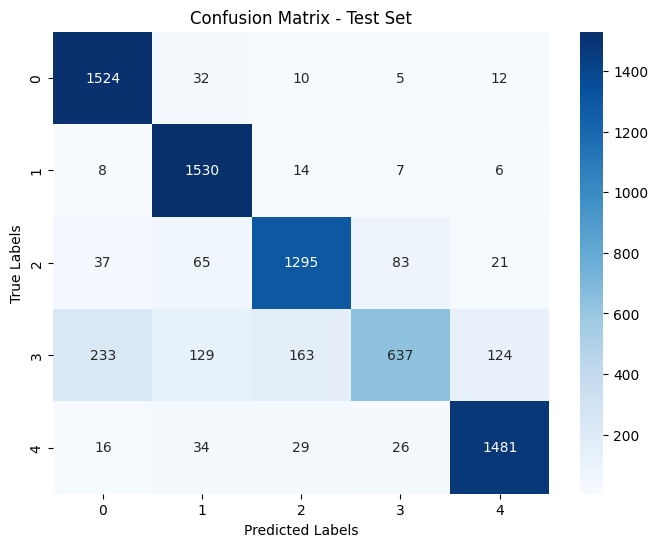

In [ ]:
 #Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred_tfidf)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_tfidf)

# Convert confusion matrix into DataFrame for better labeling
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in sorted(set(y_test))],
                     columns=[f"Pred {label}" for label in sorted(set(y_test))])

# Create interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set (TF-IDF)")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=500)

fig.show()


In [ ]:
tfidf = pd.DataFrame([['TFIDF','KNN',train_accuracy_tfidf_knn,test_accuracy_tfidf_knn,cv_accuracy_tfidf_knn,train_precision_tfidf_knn,test_precision_tfidf_knn,cv_precision_tfidf_knn,train_recall_tfidf_knn,test_recall_tfidf_knn,cv_recall_tfidf_knn]],columns=col)
#results.loc[1] = new

In [ ]:
tfidf

,Featuraization,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,TFIDF,KNN,0.8689,0.859859,0.861853,0.8689,0.859859,0.861853,0.8689,0.859859,0.861853


# nb bow

In [ ]:
# Train the navie bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



mnb = MultinomialNB()
mnb.fit(X_train_bow, y_train)

# Predict on the test set and cross-validation set
y_test_pred = mnb.predict(X_test_bow)
y_cv_pred = mnb.predict(X_cv_bow)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.8607897885919426
0.8614545938040155
0.8607897885919426
0.8614545938040155
0.8607897885919426
0.8614545938040155


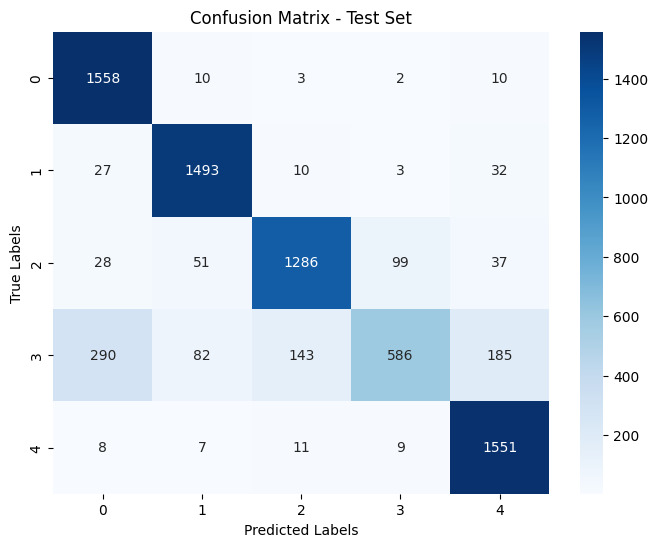

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Convert confusion matrix to DataFrame
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in sorted(set(y_test))],
                     columns=[f"Pred {label}" for label in sorted(set(y_test))])

# Create interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=500)

fig.show()


In [ ]:
alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in alpha:
    clf = MultinomialNB(alpha = i)
    clf.fit(X_train_bow, y_train)

    y_train_pred_bow = clf.predict(X_train_bow)
    y_cv_pred_bow = clf.predict(X_cv_bow)


    train_auc.append(accuracy_score(y_train, y_train_pred_bow))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred_bow))

optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

In [ ]:
print(optimal_alpha)

0.1


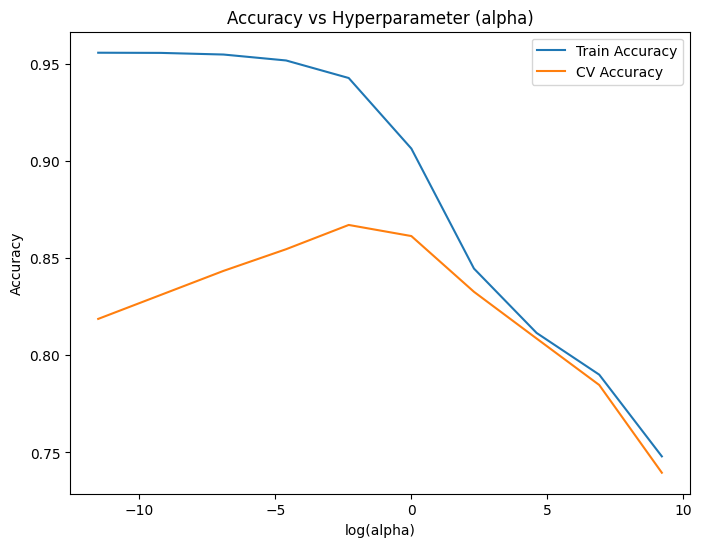

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(alpha, train_auc, label='Train Accuracy')
plt.plot(alpha, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (alpha)')
plt.xlabel('log(alpha)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# DataFrame
df_plot = pd.DataFrame({
    "log_alpha": alpha,
    "Train Accuracy": train_auc,
    "CV Accuracy": cv_auc
})

# Long format
df_long = df_plot.melt(id_vars=["log_alpha"],
                       value_vars=["Train Accuracy", "CV Accuracy"],
                       var_name="Type", value_name="Accuracy")

# Interactive line plot
fig = px.line(df_long,
              x="log_alpha",
              y="Accuracy",
              color="Type",
              markers=True,
              title="Accuracy vs Hyperparameter (alpha)")

# Axis labels
fig.update_xaxes(title="log(alpha)")
fig.update_yaxes(title="Accuracy")

# Layout settings
fig.update_layout(title_font_size=20,
                  legend_title_text="",
                  width=800, height=600)

fig.show()


In [ ]:
clf = MultinomialNB(alpha = optimal_alpha )
clf.fit(X_train_bow, y_train)


# Predict on the test set and cross-validation set
y_train_pred_bow=clf.predict(X_train_bow)
y_test_pred_bow = clf.predict(X_test_bow)
y_cv_pred_bow = clf.predict(X_cv_bow)

# Evaluate the model
train_accuracy_bow_nb= accuracy_score(y_train,y_train_pred_bow)
test_accuracy_bow_nb = accuracy_score(y_test, y_test_pred_bow)
cv_accuracy_bow_nb = accuracy_score(y_cv, y_cv_pred_bow)

train_precision_bow_nb= precision_score(y_train,y_train_pred_bow, average='micro')
test_precision_bow_nb = precision_score(y_test, y_test_pred_bow, average='micro')
cv_precision_bow_nb = precision_score(y_cv, y_cv_pred_bow, average='micro')

train_recall_bow_nb= recall_score(y_train,y_train_pred_bow, average='micro')
test_recall_bow_nb = recall_score(y_test, y_test_pred_bow, average='micro')
cv_recall_bow_nb = recall_score(y_cv, y_cv_pred_bow, average='micro')

In [ ]:
print(train_accuracy_bow_nb)
print(test_accuracy_bow_nb)
print(cv_accuracy_bow_nb)
print(train_precision_bow_nb)
print(test_precision_bow_nb)
print(cv_precision_bow_nb)
print(train_recall_bow_nb)
print(test_recall_bow_nb)
print(cv_recall_bow_nb)

0.9428710721092053
0.867836723839915
0.867171918627842
0.9428710721092053
0.867836723839915
0.867171918627842
0.9428710721092053
0.867836723839915
0.867171918627842


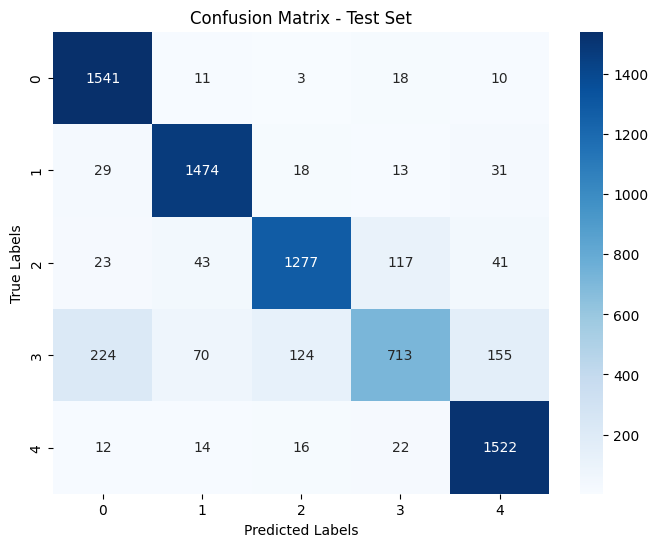

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred_bow)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_bow)

# Convert to DataFrame
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in sorted(set(y_test))],
                     columns=[f"Pred {label}" for label in sorted(set(y_test))])

# Create interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set (BoW)")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=500)

fig.show()


In [ ]:
bow_nb = pd.DataFrame([['bow','nb',train_accuracy_bow_nb,test_accuracy_bow_nb,cv_accuracy_bow_nb,train_precision_bow_nb,test_precision_bow_nb,cv_precision_bow_nb,train_recall_bow_nb,test_recall_bow_nb,cv_recall_bow_nb]],columns=col)

In [ ]:
bow_nb

,Featuraization,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,bow,nb,0.942871,0.867837,0.867172,0.942871,0.867837,0.867172,0.942871,0.867837,0.867172


# nb tfidf

In [ ]:
# Train the navie bayes
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Predict on the test set and cross-validation set
y_test_pred = mnb.predict(X_test_tfidf)
y_cv_pred = mnb.predict(X_cv_tfidf)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.8396489828480256
0.8373886451269777
0.8396489828480256
0.8373886451269777
0.8396489828480256
0.8373886451269777


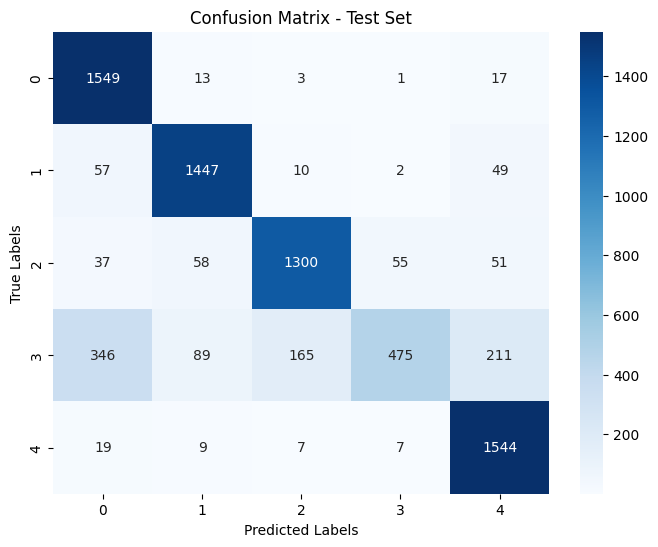

In [ ]:
 #Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Convert confusion matrix into DataFrame
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in sorted(set(y_test))],
                     columns=[f"Pred {label}" for label in sorted(set(y_test))])

# Create interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=500)

fig.show()


In [ ]:
alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in alpha:
    clf = MultinomialNB(alpha = i)
    clf.fit(X_train_tfidf, y_train)

    y_train_pred_tfidf = clf.predict(X_train_tfidf)
    y_cv_pred_tfidf = clf.predict(X_cv_tfidf)


    train_auc.append(accuracy_score(y_train, y_train_pred_tfidf))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred_tfidf))

optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

In [ ]:
print(optimal_alpha)

0.1


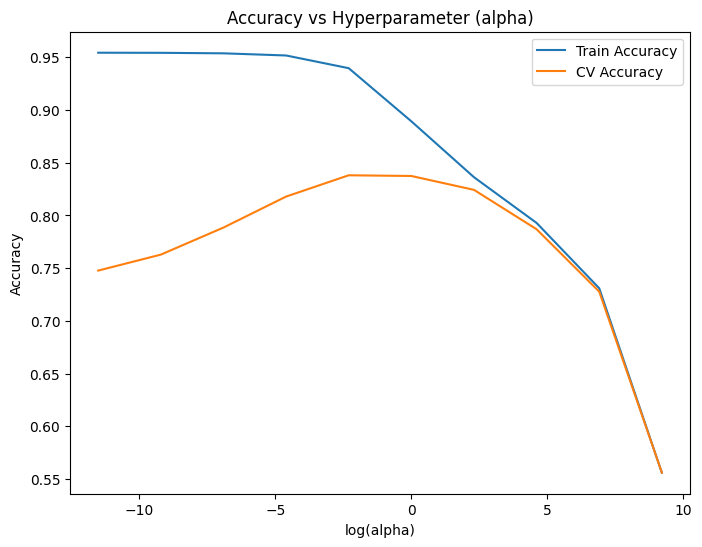

In [ ]:
# Plot accuracy vs log(alpha)
plt.figure(figsize=(8, 6))
plt.plot(alpha, train_auc, label='Train Accuracy')
plt.plot(alpha, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (alpha)')
plt.xlabel('log(alpha)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# DataFrame
df_plot = pd.DataFrame({
    "log_alpha": alpha,
    "Train Accuracy": train_auc,
    "CV Accuracy": cv_auc
})

# Long format
df_long = df_plot.melt(id_vars=["log_alpha"],
                       value_vars=["Train Accuracy", "CV Accuracy"],
                       var_name="Type", value_name="Accuracy")

# Interactive line plot
fig = px.line(df_long,
              x="log_alpha",
              y="Accuracy",
              color="Type",
              markers=True,
              title="Accuracy vs Hyperparameter (alpha)")

# Axis labels
fig.update_xaxes(title="log(alpha)")
fig.update_yaxes(title="Accuracy")

# Layout settings
fig.update_layout(title_font_size=20,
                  legend_title_text="",
                  width=800, height=600)

fig.show()


In [ ]:
clf = MultinomialNB(alpha = optimal_alpha )
clf.fit(X_train_tfidf, y_train)


# Predict on the test set and cross-validation set
y_train_pred_tfidf=clf.predict(X_train_tfidf)
y_test_pred_tfidf = clf.predict(X_test_tfidf)
y_cv_pred_tfidf = clf.predict(X_cv_tfidf)

# Evaluate the model
train_accuracy_tfidf_nb= accuracy_score(y_train,y_train_pred_tfidf)
test_accuracy_tfidf_nb = accuracy_score(y_test, y_test_pred_tfidf)
cv_accuracy_tfidf_nb = accuracy_score(y_cv, y_cv_pred_tfidf)

train_precision_tfidf_nb= precision_score(y_train,y_train_pred_tfidf, average='micro')
test_precision_tfidf_nb = precision_score(y_test, y_test_pred_tfidf, average='micro')
cv_precision_tfidf_nb = precision_score(y_cv, y_cv_pred_tfidf, average='micro')

train_recall_tfidf_nb= recall_score(y_train,y_train_pred_tfidf, average='micro')
test_recall_tfidf_nb = recall_score(y_test, y_test_pred_tfidf, average='micro')
cv_recall_tfidf_nb = recall_score(y_cv, y_cv_pred_tfidf, average='micro')

In [ ]:
print(train_accuracy_tfidf_nb)
print(test_accuracy_tfidf_nb)
print(cv_accuracy_tfidf_nb)
print(train_precision_tfidf_nb)
print(test_precision_tfidf_nb)
print(cv_precision_tfidf_nb)
print(train_recall_tfidf_nb)
print(test_recall_tfidf_nb)
print(cv_recall_tfidf_nb)

0.9396356867437841
0.8427070868235607
0.8380534503390507
0.9396356867437841
0.8427070868235607
0.8380534503390507
0.9396356867437841
0.8427070868235607
0.8380534503390507


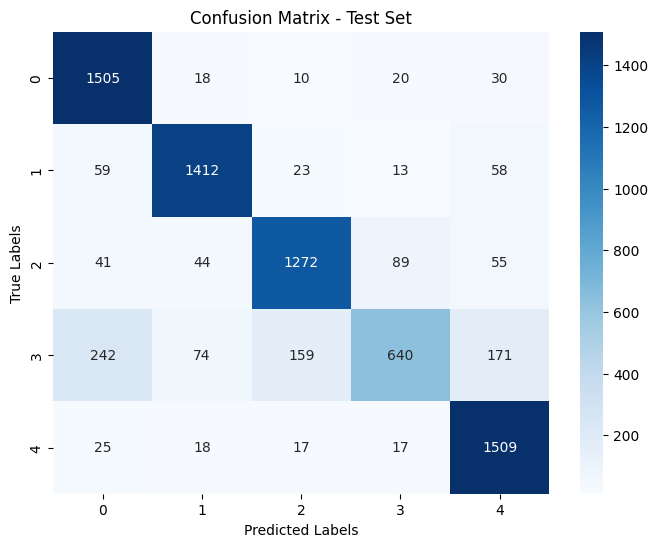

In [ ]:
 #Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred_tfidf)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_tfidf)

# Convert confusion matrix to DataFrame
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in sorted(set(y_test))],
                     columns=[f"Pred {label}" for label in sorted(set(y_test))])

# Create interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set (TF-IDF)")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=500)

fig.show()


In [ ]:
tfidf_nb = pd.DataFrame([['TFIDF','nb',train_accuracy_tfidf_nb,test_accuracy_tfidf_nb,cv_accuracy_tfidf_nb,train_precision_tfidf_nb,test_precision_tfidf_nb,cv_precision_tfidf_nb,train_recall_tfidf_nb,test_recall_tfidf_nb,cv_recall_tfidf_nb]],columns=col)

In [ ]:
results=pd.DataFrame()
results=pd.concat([results,bow,tfidf,bow_nb,tfidf_nb],ignore_index=True)

results

,Featuraization,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,BOW,KNN,0.905686,0.880335,0.884856,0.907742,0.884245,0.889515,0.903824,0.877815,0.882559
1,TFIDF,KNN,0.868900,0.859859,0.861853,0.868900,0.859859,0.861853,0.868900,0.859859,0.861853
2,bow,nb,0.942871,0.867837,0.867172,0.942871,0.867837,0.867172,0.942871,0.867837,0.867172
3,TFIDF,nb,0.939636,0.842707,0.838053,0.939636,0.842707,0.838053,0.939636,0.842707,0.838053


# linearsvm

In [ ]:


from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

log = LinearSVC()
log.fit(X_train_bow, y_train)


# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test_bow)
y_cv_pred = log.predict(X_cv_bow)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.9256747772902539
0.9244781279085228
0.9256747772902539
0.9244781279085228
0.9256747772902539
0.9244781279085228


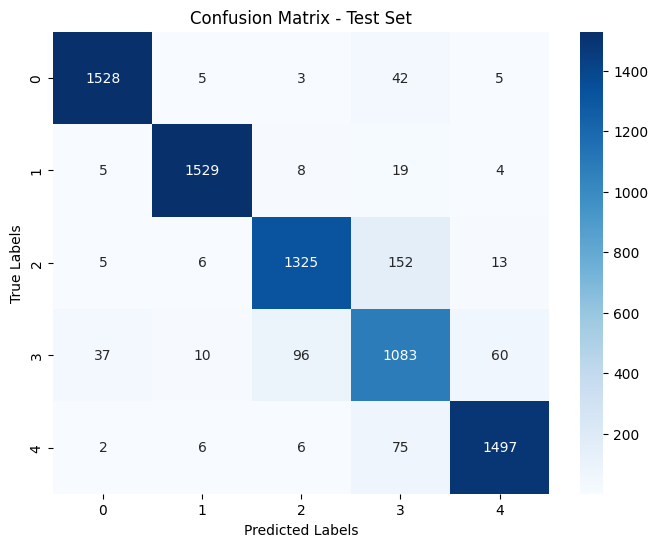

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Convert confusion matrix into DataFrame
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in sorted(set(y_test))],
                     columns=[f"Pred {label}" for label in sorted(set(y_test))])

# Create interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,                # annot=True effect
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=500)

fig.show()


In [ ]:
from sklearn.svm import LinearSVC


c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:

    clf = LinearSVC(C=i)
    clf.fit(X_train_bow, y_train)


    y_train_pred_bow = clf.predict(X_train_bow)
    y_cv_pred_bow = clf.predict(X_cv_bow)


    train_auc.append(accuracy_score(y_train, y_train_pred_bow))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred_bow))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]




import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
print(optimal_c)

0.1


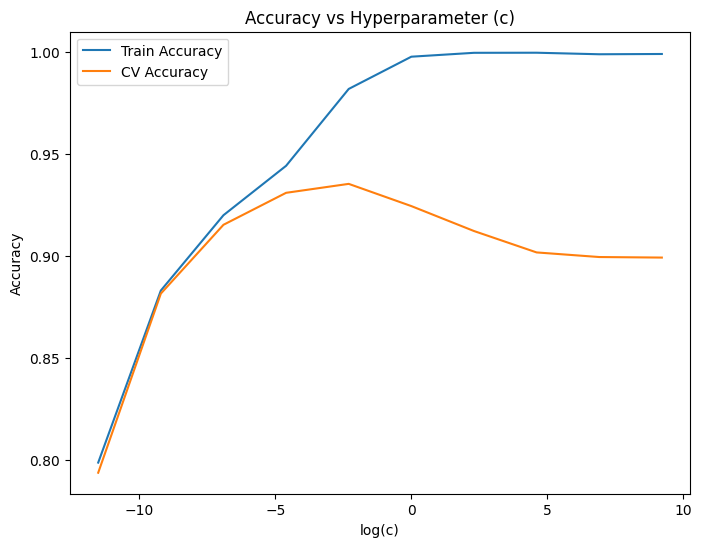

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# DataFrame
df_plot = pd.DataFrame({
    "log_c": c,
    "Train Accuracy": train_auc,
    "CV Accuracy": cv_auc
})

# Long format
df_long = df_plot.melt(id_vars=["log_c"],
                       value_vars=["Train Accuracy", "CV Accuracy"],
                       var_name="Type", value_name="Accuracy")

# Interactive line plot
fig = px.line(df_long,
              x="log_c",
              y="Accuracy",
              color="Type",
              markers=True,
              title="Accuracy vs Hyperparameter (c)")

# Axis labels
fig.update_xaxes(title="log(c)")
fig.update_yaxes(title="Accuracy")

# Layout settings
fig.update_layout(title_font_size=20,
                  legend_title_text="",
                  width=800, height=600)

fig.show()


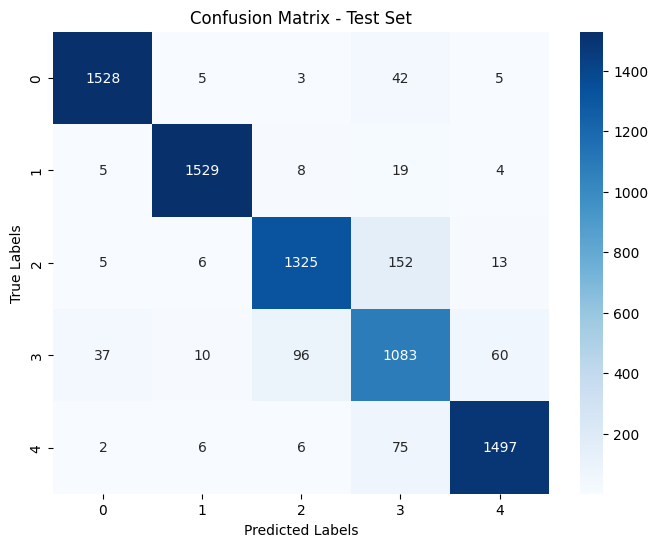

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Pandas DataFrame
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {i}" for i in range(len(cm_test))],
                     columns=[f"Pred {i}" for i in range(len(cm_test))])

# Interactive heatmap
fig = px.imshow(cm_df,
                text_auto=True,   # values inside cells
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=600)

fig.show()


In [ ]:
lsvm_bow = LinearSVC(C=optimal_c)
lsvm_bow.fit(X_train_bow, y_train)



# Predict on the test set and cross-validation set
y_train_pred_bow=lsvm_bow.predict(X_train_bow)
y_test_pred_bow = lsvm_bow.predict(X_test_bow)
y_cv_pred_bow = lsvm_bow.predict(X_cv_bow)

# Evaluate the model
train_accuracy_bow_log= accuracy_score(y_train,y_train_pred_bow)
test_accuracy_bow_log = accuracy_score(y_test, y_test_pred_bow)
cv_accuracy_bow_log = accuracy_score(y_cv, y_cv_pred_bow)

train_precision_bow_log= precision_score(y_train,y_train_pred_bow, average='micro')
test_precision_bow_log = precision_score(y_test, y_test_pred_bow, average='micro')
cv_precision_bow_log = precision_score(y_cv, y_cv_pred_bow, average='micro')

train_recall_bow_log= recall_score(y_train,y_train_pred_bow, average='micro')
test_recall_bow_log = recall_score(y_test, y_test_pred_bow, average='micro')
cv_recall_bow_log = recall_score(y_cv, y_cv_pred_bow, average='micro')

In [ ]:
print(train_accuracy_bow_log)
print(test_accuracy_bow_log)
print(cv_accuracy_bow_log)
print(train_precision_bow_log)
print(test_precision_bow_log)
print(cv_precision_bow_log)
print(train_recall_bow_log)
print(test_recall_bow_log)
print(cv_recall_bow_log)

0.9819616185790897
0.9327217125382263
0.9353809333865177
0.9819616185790897
0.9327217125382263
0.9353809333865177
0.9819616185790897
0.9327217125382263
0.9353809333865177


In [ ]:
bow_log4 = pd.DataFrame([['bow','linearsvm',train_accuracy_bow_log,  test_accuracy_bow_log, cv_accuracy_bow_log, train_precision_bow_log, test_precision_bow_log,  cv_precision_bow_log, train_recall_bow_log, test_recall_bow_log,cv_recall_bow_log]],columns=col)

In [ ]:
bow_log4

,Featuraization,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,bow,linearsvm,0.981962,0.932722,0.935381,0.981962,0.932722,0.935381,0.981962,0.932722,0.935381


In [ ]:
import plotly.express as px

# Create interactive scatter plot
fig = px.scatter(data, x="text_len", y="cyberbullying_type", color="cyberbullying_type")

# Show in browser (interactive)
fig.show()

# linear svm ifdif

In [ ]:


from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

log = LinearSVC()
log.fit(X_train_tfidf, y_train)


# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test_tfidf)
y_cv_pred = log.predict(X_cv_tfidf)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.9270043877143996
0.9271373487568143
0.9270043877143996
0.9271373487568143
0.9270043877143996
0.9271373487568143


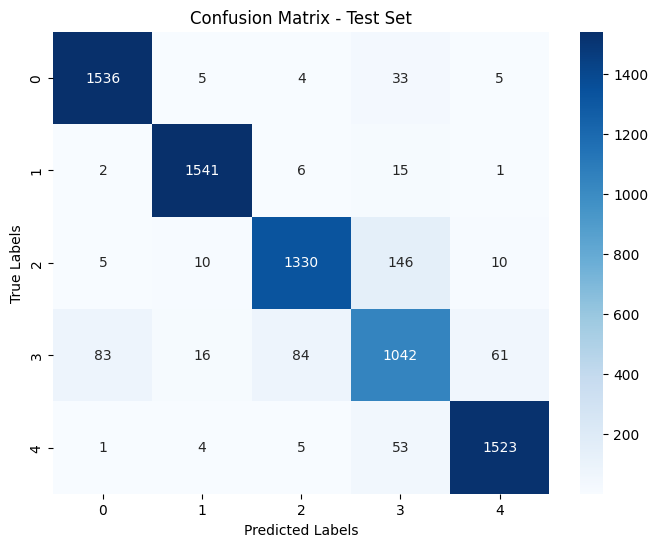

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Class labels
class_labels = sorted(y_test.unique())

# Pandas DataFrame
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in class_labels],
                     columns=[f"Pred {label}" for label in class_labels])

# Interactive heatmap (seaborn style replicate)
fig = px.imshow(cm_df,
                text_auto=True,               # values inside cells
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=600)

fig.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:

    clf = LinearSVC(C=i)
    clf.fit(X_train_tfidf, y_train)


    y_train_pred_tfidf = clf.predict(X_train_tfidf)
    y_cv_pred_tfidf = clf.predict(X_cv_tfidf)


    train_auc.append(accuracy_score(y_train, y_train_pred_tfidf))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred_tfidf))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]




import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(optimal_c)

1


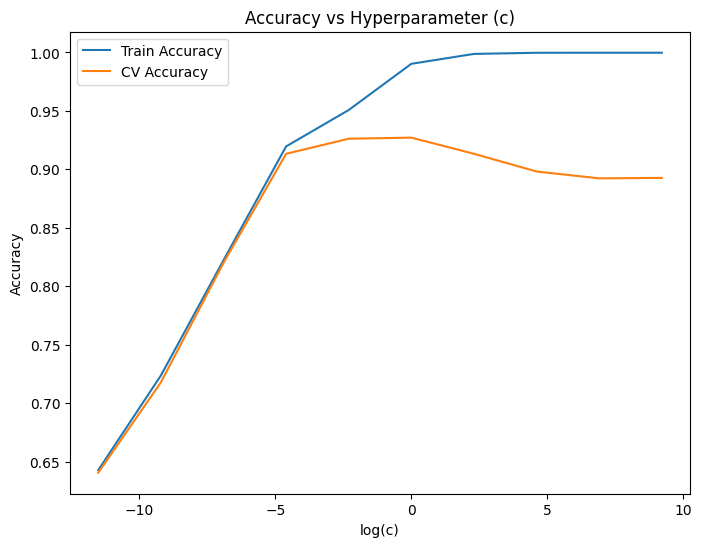

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Sample data
df = pd.DataFrame({
    "log_c": c,
    "Train Accuracy": train_auc,
    "CV Accuracy": cv_auc
})

# Melt data for easy plotting
df_melt = df.melt(id_vars=["log_c"],
                  value_vars=["Train Accuracy", "CV Accuracy"],
                  var_name="Type", value_name="Accuracy")

# Interactive line plot
fig = px.line(df_melt,
              x="log_c", y="Accuracy",
              color="Type",
              markers=True,
              title="Accuracy vs Hyperparameter (C)")

# Axis labels
fig.update_xaxes(title="log(C)")
fig.update_yaxes(title="Accuracy")

# Layout
fig.update_layout(title_font_size=20,
                  width=800, height=600,
                  legend_title_text="")

fig.show()


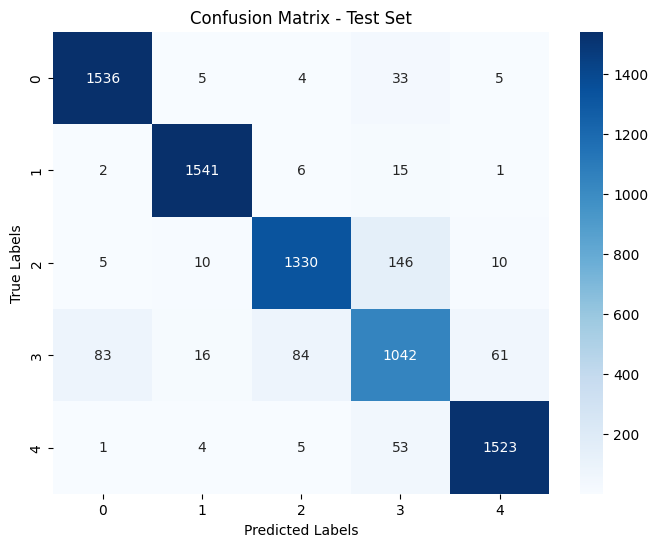

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Class labels
class_labels = sorted(y_test.unique())

# Convert to DataFrame
cm_df = pd.DataFrame(cm_test,
                     index=[f"True {label}" for label in class_labels],
                     columns=[f"Pred {label}" for label in class_labels])

# Interactive heatmap (equivalent to sns.heatmap)
fig = px.imshow(cm_df,
                text_auto=True,              # values inside cells
                color_continuous_scale="Blues",
                title="Confusion Matrix - Test Set")

# Axis labels
fig.update_xaxes(title="Predicted Labels")
fig.update_yaxes(title="True Labels")

# Layout settings
fig.update_layout(title_font_size=20,
                  width=700, height=600)

fig.show()

In [ ]:
lsvm_tfidf = LinearSVC(C=optimal_c)
lsvm_tfidf.fit(X_train_tfidf, y_train)



# Predict on the test set and cross-validation set
y_train_pred_tfidf=lsvm_tfidf.predict(X_train_tfidf)
y_test_pred_tfidf = lsvm_tfidf.predict(X_test_tfidf)
y_cv_pred_tfidf = lsvm_tfidf.predict(X_cv_tfidf)

# Evaluate the model
train_accuracy_tfidf_log= accuracy_score(y_train,y_train_pred_tfidf)
test_accuracy_tfidf_log = accuracy_score(y_test, y_test_pred_tfidf)
cv_accuracy_tfidf_log = accuracy_score(y_cv, y_cv_pred_tfidf)

train_precision_tfidf_log= precision_score(y_train,y_train_pred_tfidf, average='micro')
test_precision_tfidf_log = precision_score(y_test, y_test_pred_tfidf, average='micro')
cv_precision_tfidf_log = precision_score(y_cv, y_cv_pred_tfidf, average='micro')

train_recall_tfidf_log= recall_score(y_train,y_train_pred_tfidf, average='micro')
test_recall_tfidf_log = recall_score(y_test, y_test_pred_tfidf, average='micro')
cv_recall_tfidf_log = recall_score(y_cv, y_cv_pred_tfidf, average='micro')

In [ ]:
print(train_accuracy_tfidf_log)
print(test_accuracy_tfidf_log)
print(cv_accuracy_tfidf_log)
print(train_precision_tfidf_log)
print(test_precision_tfidf_log)
print(cv_precision_tfidf_log)
print(train_recall_tfidf_log)
print(test_recall_tfidf_log)
print(cv_recall_tfidf_log)

0.9902938439037362
0.9270043877143996
0.9271373487568143
0.9902938439037362
0.9270043877143996
0.9271373487568143
0.9902938439037362
0.9270043877143996
0.9271373487568143


In [ ]:
tfidf_log4 = pd.DataFrame([['tfidf','linearsvm',train_accuracy_tfidf_log,  test_accuracy_tfidf_log, cv_accuracy_tfidf_log, train_precision_tfidf_log, test_precision_tfidf_log,  cv_precision_tfidf_log, train_recall_tfidf_log, test_recall_tfidf_log,cv_recall_tfidf_log]],columns=col)

In [ ]:
results=pd.DataFrame()
results=pd.concat([results,bow,tfidf,bow_nb,tfidf_nb,bow_log4,tfidf_log4 ],ignore_index=True)

results


,Featuraization,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall
0,BOW,KNN,0.905686,0.880335,0.884856,0.907742,0.884245,0.889515,0.903824,0.877815,0.882559
1,TFIDF,KNN,0.868900,0.859859,0.861853,0.868900,0.859859,0.861853,0.868900,0.859859,0.861853
2,bow,nb,0.942871,0.867837,0.867172,0.942871,0.867837,0.867172,0.942871,0.867837,0.867172
3,TFIDF,nb,0.939636,0.842707,0.838053,0.939636,0.842707,0.838053,0.939636,0.842707,0.838053
4,bow,linearsvm,0.981962,0.932722,0.935381,0.981962,0.932722,0.935381,0.981962,0.932722,0.935381
5,tfidf,linearsvm,0.990294,0.927004,0.927137,0.990294,0.927004,0.927137,0.990294,0.927004,0.927137
